## Let's start with Python

In [1]:
import awkward as ak

In [2]:
from juliacall import Main as jl

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


pip install parquet
pip install pyarrow
pip install pandas

In [3]:
events = ak.from_parquet("./SMHiggsToZZTo4L.parquet")

In [4]:
events.muon

<Array [[{pt: 63, eta: -0.719, ...}, ...], ...] type='299973 * var * Moment...'>

In [5]:
muplus = events.muon[events.muon.charge > 0]
muminus = events.muon[events.muon.charge < 0]

In [6]:
mu1, mu2 = ak.unzip(ak.cartesian((muplus, muminus)))

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import vector
vector.register_awkward()

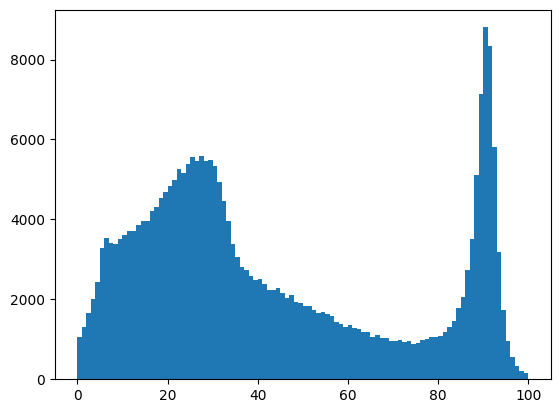

In [8]:
plt.hist(ak.ravel(
    
    (mu1 + mu2).mass

), bins=100, range=(0, 100));

In [9]:
def fast_mass(mu1, mu2):
    return np.sqrt(
        2 * mu1.pt * mu2.pt * (np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi))
    )

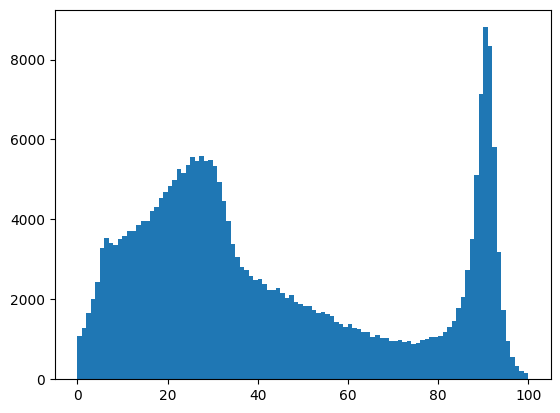

In [10]:
plt.hist(ak.ravel(
    
    fast_mass(mu1, mu2)

), bins=100, range=(0, 100));

In [11]:
def fast_mass_pedantic(mu1, mu2):
    tmp1 = mu1.eta - mu2.eta
    tmp2 = np.cosh(tmp1)
    del tmp1
    tmp3 = mu1.phi - mu2.phi
    tmp4 = np.cos(tmp3)
    del tmp3
    tmp5 = tmp2 - tmp4
    del tmp2
    del tmp4
    tmp6 = mu2.pt * tmp5
    del tmp5
    tmp7 = mu1.pt * tmp6
    del tmp6
    tmp8 = 2 * tmp7
    del tmp7
    tmp9 = np.sqrt(tmp8)
    del tmp8
    return tmp9

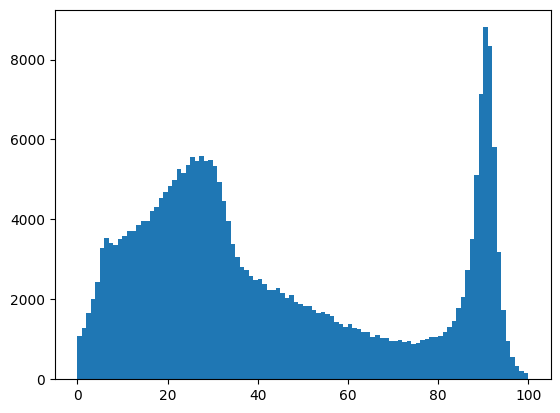

In [12]:
plt.hist(ak.ravel(
    
    fast_mass_pedantic(mu1, mu2)

), bins=100, range=(0, 100));

In [13]:
%%timeit

fast_mass(mu1, mu2)

6.64 ms ± 103 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit

fast_mass_pedantic(mu1, mu2)

6.57 ms ± 119 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## The same with Julia